In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# MS-SQL(Database) Connection

In [2]:
#MS-SQL connection

conn_str = (
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=RYAN\SQLEXPRESS;"
    r"DATABASE=law_firm_analytics;"
    r"Trusted_Connection=yes;"
)

In [3]:
# Establish connection
conn = pyodbc.connect(conn_str)

In [4]:
#getting the data

#attorney data
query_1 = "SELECT * FROM attorney_data" 
attorney_data = pd.read_sql(query_1, conn)

#attorney logs
query_2 = "SELECT * FROM attorney_logs" 
attorney_logs = pd.read_sql(query_2, conn)

#billing records
query_3 = "SELECT * FROM billing_records" 
billing_records = pd.read_sql(query_3, conn)

#case data
query_4 = "SELECT * FROM  case_data" 
case_data = pd.read_sql(query_4, conn)

#client data
query_5 = "SELECT * FROM client_data" 
client_data = pd.read_sql(query_5, conn)

C:\Users\ryan2\AppData\Local\Temp\ipykernel_24652\2353997330.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  attorney_data = pd.read_sql(query_1, conn)
C:\Users\ryan2\AppData\Local\Temp\ipykernel_24652\2353997330.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  attorney_logs = pd.read_sql(query_2, conn)
C:\Users\ryan2\AppData\Local\Temp\ipykernel_24652\2353997330.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  billing_records = pd.read_sql(query_3, conn)
C:\Users\ryan2\AppData\Local\Temp\ipykernel_24652\23539973

In [5]:
conn.close()

In [6]:
attorney_data.head()

,Attorney_ID,Name,Position,Hourly_Rate
0,A001,Miss Cassandra Boyer,Paralegal,430
1,A002,Lisa Gonzalez,Associate,187
2,A003,Barbara Osborne,Paralegal,472
3,A004,Selena Sims,Paralegal,199
4,A005,Donald Thomas,Associate,459


In [7]:
attorney_data.shape

(10, 4)

In [8]:
attorney_logs.head()

,Attorney_ID,Case_ID,Date,Hours_Worked,Task_Type,Billable
0,A008,CASE003,2025-04-27,2.6,Review,True
1,A009,CASE013,2025-03-21,1.1,Research,False
2,A006,CASE030,2025-03-19,2.0,Court Appearance,True
3,A008,CASE021,2025-03-21,2.0,Court Appearance,True
4,A010,CASE015,2025-04-25,6.3,Client Call,True


In [9]:
attorney_logs.shape

(300, 6)

In [10]:
billing_records.head()

,Invoice_ID,Client_ID,Case_ID,Billed_Hours,Amount_Billed,Payment_Received,Invoice_Date
0,INV0001,C003,CASE013,16.9,5813.600098,5099.040039,2025-03-18
1,INV0002,C005,CASE022,6.8,1047.199951,841.489990,2025-03-27
2,INV0003,C003,CASE020,15.9,4547.399902,3778.149902,2025-04-04
3,INV0004,C014,CASE009,7.3,1715.500000,1602.150024,2025-04-15
4,INV0005,C005,CASE022,4.1,1258.699951,1065.150024,2025-03-15


In [11]:
billing_records.shape

(100, 7)

In [12]:
case_data.head()

,Case_ID,Client_ID,Case_Type,Start_Date,End_Date,Case_Status
0,CASE001,C001,Criminal,2025-04-09,2025-04-16,Closed
1,CASE002,C011,Civil,2025-02-15,2025-04-21,Closed
2,CASE003,C011,Criminal,2025-03-29,2025-04-19,Closed
3,CASE004,C015,Civil,2025-04-01,2025-04-17,Closed
4,CASE005,C010,Criminal,2025-03-29,2025-05-04,Closed


In [13]:
case_data.shape

(30, 6)

In [14]:
client_data.head()

,Client_ID,Client_Name,Industry
0,C001,Fuller-Benson,Healthcare
1,C002,"Castillo, Pittman and Moss",Healthcare
2,C003,Jackson Group,Real Estate
3,C004,Moore-Cortez,Real Estate
4,C005,"Glass, Garcia and Ferguson",Real Estate


In [15]:
client_data.shape

(15, 3)

# Data Preparation

In [16]:
attorney_logs['Date'] = pd.to_datetime(attorney_logs['Date'])
case_data['Start_Date'] = pd.to_datetime(case_data['Start_Date'])
case_data['End_Date'] = pd.to_datetime(case_data['End_Date'])
billing_records['Invoice_Date'] = pd.to_datetime(billing_records['Invoice_Date'])

In [17]:
merged_df = attorney_logs.merge(attorney_data, on='Attorney_ID') \
                           .merge(case_data, on='Case_ID') \
                           .merge(client_data, on='Client_ID')

In [18]:
merged_df.head()

,Attorney_ID,Case_ID,Date,Hours_Worked,Task_Type,Billable,Name,Position,Hourly_Rate,Client_ID,Case_Type,Start_Date,End_Date,Case_Status,Client_Name,Industry
0,A008,CASE003,2025-04-27,2.6,Review,True,Krystal Wilson,Partner,249,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
1,A008,CASE003,2025-04-20,1.8,Court Appearance,True,Krystal Wilson,Partner,249,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
2,A009,CASE003,2025-04-28,2.3,Research,True,Patrick Beck,Paralegal,408,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
3,A009,CASE003,2025-05-04,0.6,Drafting,False,Patrick Beck,Paralegal,408,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
4,A009,CASE003,2025-05-11,2.8,Court Appearance,True,Patrick Beck,Paralegal,408,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Attorney_ID   300 non-null    object        
 1   Case_ID       300 non-null    object        
 2   Date          300 non-null    datetime64[ns]
 3   Hours_Worked  300 non-null    float64       
 4   Task_Type     300 non-null    object        
 5   Billable      300 non-null    bool          
 6   Name          300 non-null    object        
 7   Position      300 non-null    object        
 8   Hourly_Rate   300 non-null    int64         
 9   Client_ID     300 non-null    object        
 10  Case_Type     300 non-null    object        
 11  Start_Date    300 non-null    datetime64[ns]
 12  End_Date      300 non-null    datetime64[ns]
 13  Case_Status   300 non-null    object        
 14  Client_Name   300 non-null    object        
 15  Industry      300 non-null    object    

# Analysis

In [20]:
#utilization rate

utilization = merged_df.groupby('Attorney_ID').agg(
    Total_Hours=('Hours_Worked', 'sum'),
    Billable_Hours=('Billable', lambda x: merged_df.loc[x.index, 'Hours_Worked'][x].sum()))

In [21]:
utilization

,Total_Hours,Billable_Hours
Attorney_ID,,
A001,167.899999,137.099999
A002,168.099999,133.600000
A003,127.999999,108.899999
A004,119.200001,80.500000
A005,97.500000,87.100000
A006,113.900000,99.700000
A007,133.299999,92.100000
A008,122.500000,98.500000
A009,143.900000,132.800000


In [22]:
utilization['Utilization_Rate'] = (utilization['Billable_Hours'] / utilization['Total_Hours']).round(2)
utilization.head()

,Total_Hours,Billable_Hours,Utilization_Rate
Attorney_ID,,,
A001,167.899999,137.099999,0.82
A002,168.099999,133.600000,0.79
A003,127.999999,108.899999,0.85
A004,119.200001,80.500000,0.68
A005,97.500000,87.100000,0.89


In [23]:
#Realization Rate
case_hours = merged_df.groupby('Case_ID').agg(
    Logged_Hours=('Hours_Worked', 'sum'),
    Billed_Hours=('Billable', lambda x: merged_df.loc[x.index, 'Hours_Worked'][x].sum())
).reset_index()

In [24]:
case_hours['Realization_Rate'] = (case_hours['Billed_Hours'] / case_hours['Logged_Hours']).round(2)
case_hours.head()

,Case_ID,Logged_Hours,Billed_Hours,Realization_Rate
0,CASE001,41.400000,38.3,0.93
1,CASE002,28.300000,24.0,0.85
2,CASE003,53.200000,47.1,0.89
3,CASE004,55.400001,34.0,0.61
4,CASE005,36.800000,26.3,0.71


In [25]:
#collection

billing_summary = billing_records.groupby('Case_ID').agg(
    Amount_Billed=('Amount_Billed', 'sum'),
    Payment_Received=('Payment_Received', 'sum')
).reset_index()

# Collection Rate
billing_summary['Collection_Rate'] = (billing_summary['Payment_Received'] / billing_summary['Amount_Billed']).round(2)

In [26]:
billing_summary.head()

,Case_ID,Amount_Billed,Payment_Received,Collection_Rate
0,CASE002,15024.299927,12945.270142,0.86
1,CASE003,14527.799805,12264.589966,0.84
2,CASE004,9608.800049,8223.299805,0.86
3,CASE005,5518.200073,4653.150024,0.84
4,CASE006,7997.500122,6474.950134,0.81


In [27]:
case_data['Case_Duration_Days'] = (case_data['End_Date'] - case_data['Start_Date']).dt.days

In [28]:
case_data

,Case_ID,Client_ID,Case_Type,Start_Date,End_Date,Case_Status,Case_Duration_Days
0,CASE001,C001,Criminal,2025-04-09,2025-04-16,Closed,7
1,CASE002,C011,Civil,2025-02-15,2025-04-21,Closed,65
2,CASE003,C011,Criminal,2025-03-29,2025-04-19,Closed,21
3,CASE004,C015,Civil,2025-04-01,2025-04-17,Closed,16
4,CASE005,C010,Criminal,2025-03-29,2025-05-04,Closed,36
5,CASE006,C012,Intellectual Property,2025-03-20,2025-05-08,Closed,49
6,CASE007,C012,Intellectual Property,2025-02-24,2025-04-27,Closed,62
7,CASE008,C015,Corporate,2025-02-26,2025-04-21,Closed,54
8,CASE009,C014,Intellectual Property,2025-03-10,2025-05-08,Open,59
9,CASE010,C014,Corporate,2025-03-03,2025-05-04,Closed,62


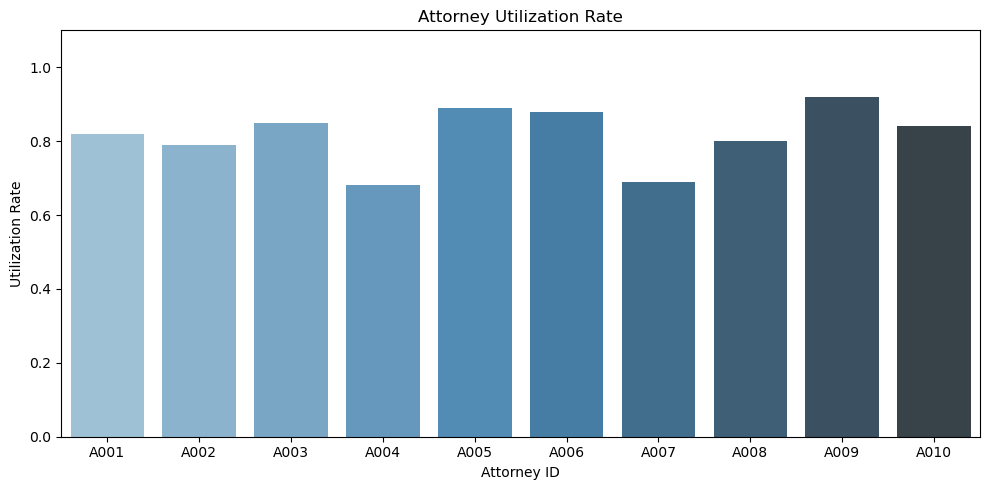

In [29]:
# Utilization Rate Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=utilization.index.astype(str), y='Utilization_Rate', data=utilization.reset_index(), palette="Blues_d")
plt.title("Attorney Utilization Rate")
plt.ylabel("Utilization Rate")
plt.xlabel("Attorney ID")
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

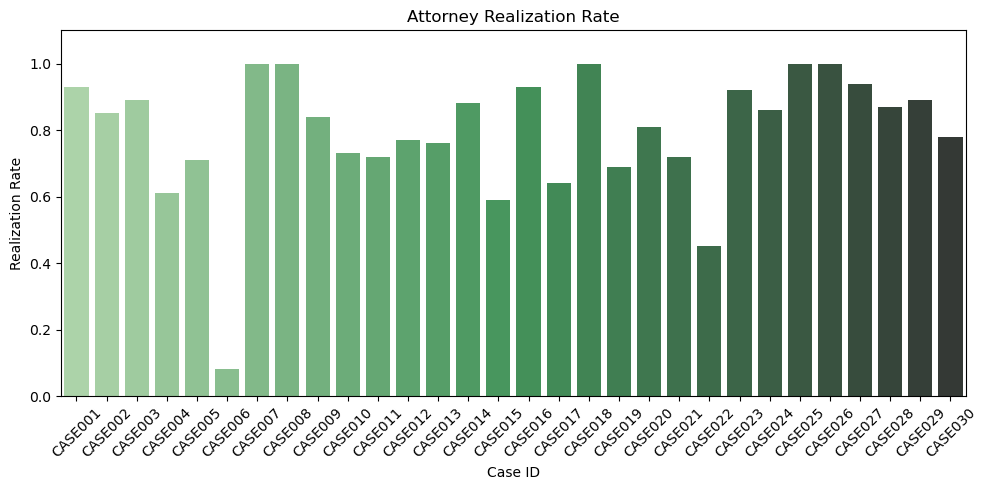

In [30]:
# Realization Rate Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Case_ID', y='Realization_Rate', data=case_hours.reset_index(), palette="Greens_d")
plt.title("Attorney Realization Rate")
plt.ylabel("Realization Rate")
plt.xlabel("Case ID")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

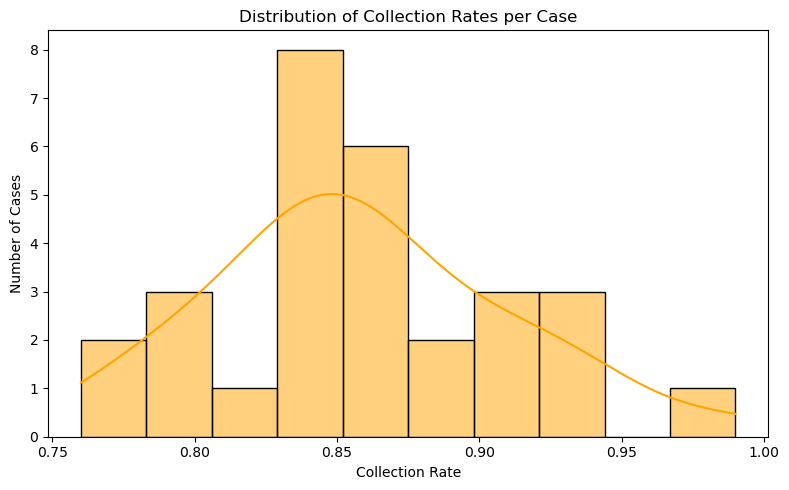

In [31]:
#Collection Rate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(billing_summary['Collection_Rate'], bins=10, kde=True, color='orange')
plt.title("Distribution of Collection Rates per Case")
plt.xlabel("Collection Rate")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

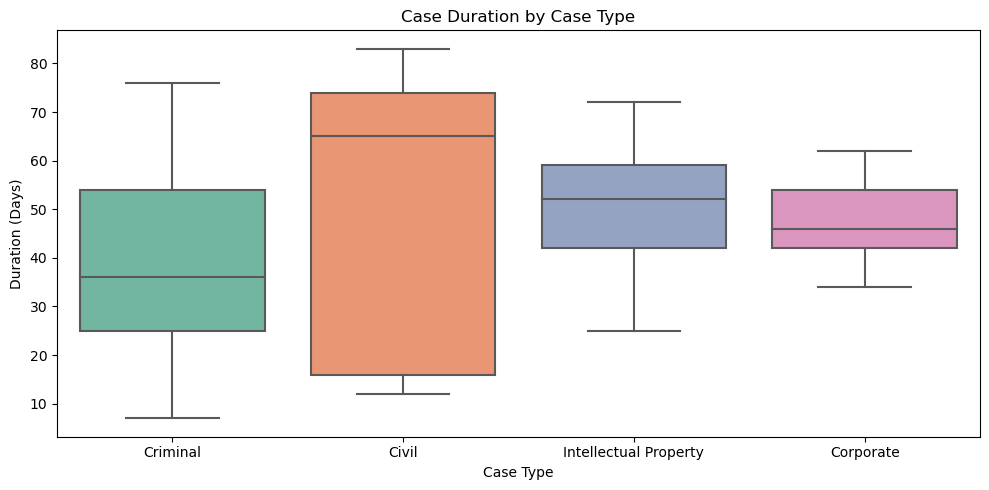

In [32]:
#Case Duration Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Case_Type', y='Case_Duration_Days', data=case_data, palette="Set2")
plt.title("Case Duration by Case Type")
plt.ylabel("Duration (Days)")
plt.xlabel("Case Type")
plt.tight_layout()
plt.show()

In [33]:
merged_df

,Attorney_ID,Case_ID,Date,Hours_Worked,Task_Type,Billable,Name,Position,Hourly_Rate,Client_ID,Case_Type,Start_Date,End_Date,Case_Status,Client_Name,Industry
0,A008,CASE003,2025-04-27,2.6,Review,True,Krystal Wilson,Partner,249,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
1,A008,CASE003,2025-04-20,1.8,Court Appearance,True,Krystal Wilson,Partner,249,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
2,A009,CASE003,2025-04-28,2.3,Research,True,Patrick Beck,Paralegal,408,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
3,A009,CASE003,2025-05-04,0.6,Drafting,False,Patrick Beck,Paralegal,408,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
4,A009,CASE003,2025-05-11,2.8,Court Appearance,True,Patrick Beck,Paralegal,408,C011,Criminal,2025-03-29,2025-04-19,Closed,Buchanan-Haynes,Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,A002,CASE005,2025-04-27,7.9,Client Call,True,Lisa Gonzalez,Associate,187,C010,Criminal,2025-03-29,2025-05-04,Closed,Parker-Williams,Healthcare
296,A003,CASE005,2025-04-26,6.2,Review,True,Barbara Osborne,Paralegal,472,C010,Criminal,2025-03-29,2025-05-04,Closed,Parker-Williams,Healthcare
297,A003,CASE005,2025-03-22,1.3,Review,False,Barbara Osborne,Paralegal,472,C010,Criminal,2025-03-29,2025-05-04,Closed,Parker-Williams,Healthcare
298,A003,CASE005,2025-04-29,1.9,Court Appearance,False,Barbara Osborne,Paralegal,472,C010,Criminal,2025-03-29,2025-05-04,Closed,Parker-Williams,Healthcare


In [34]:
time_spend_tast = pd.DataFrame(merged_df.groupby('Task_Type').agg('Hours_Worked').sum()).reset_index()

In [35]:
time_spend_tast.head()

,Task_Type,Hours_Worked
0,Client Call,230.500000
1,Court Appearance,288.699998
2,Drafting,215.099999
3,Research,338.000000
4,Review,235.700000


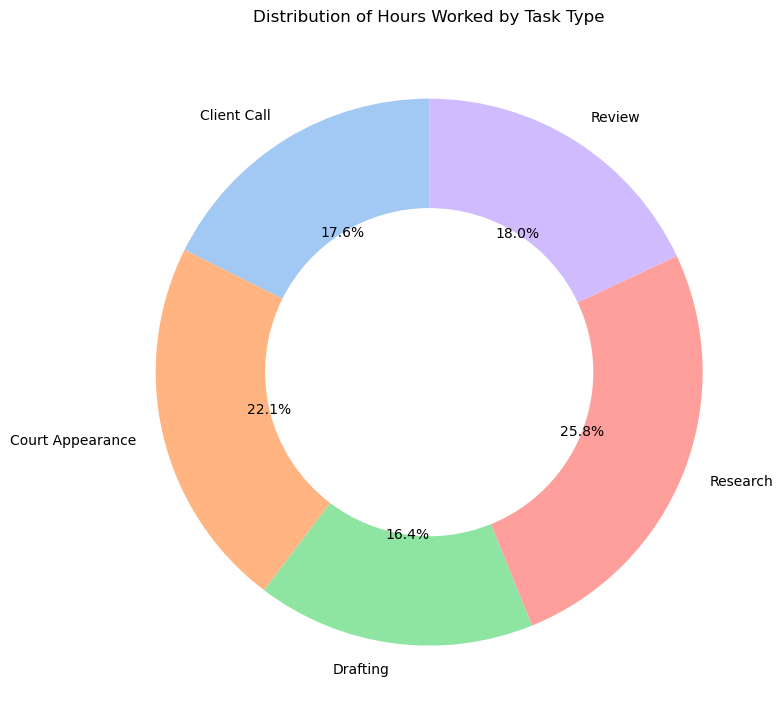

In [36]:
# Donut chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(time_spend_tast['Hours_Worked'], labels=time_spend_tast['Task_Type'], colors=colors, startangle=90, 
        wedgeprops={'width': 0.4}, autopct='%1.1f%%')
plt.title('Distribution of Hours Worked by Task Type')
plt.tight_layout()
plt.show()

In [37]:
merged_df['Case_Type'].value_counts()

Criminal                 104
Intellectual Property    101
Corporate                 50
Civil                     45
Name: Case_Type, dtype: int64

In [38]:
merged_df['Case_Status'].value_counts()

Closed    204
Open       96
Name: Case_Status, dtype: int64

In [39]:
merged_df['Industry'].value_counts()

Real Estate    137
Healthcare      96
Finance         67
Name: Industry, dtype: int64